# 2.エイムズ市の住宅価格


アイオワ州エイムズ市の住宅価格データセットを使い、基本的なデータの扱い方を学んでいきます。

住宅に関する79種類もの説明変数が用意されているため、それらと価格との関係を探索していきましょう。

エイムズがどのような街なのかもWikipediaなどで確認しておくと良いでしょう。

Ames, Iowa - Wikipedia

## 3.KaggleのNotebooks


Kaggleでは「Notebooks」としていろいろな人がデータ探索（EDA）を行ったコードが共有されています。良いEDAをたくさん見て、ノウハウを吸収していきましょう。今回の課題をやる上でも参考にしたり、課題になっていないことに挑戦したりしてください。

これ以降Kaggleを利用していきますので、アカウントを作成してください。

《参考Notebooks》

Comprehensive data exploration with Python | Kaggle（まずはここから）

House Prices : EDA to ML (Beginner) | Kaggle

A Home for Pandas and Sklearn: Beginner How-Tos | Kaggle



In [288]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

sns.set()

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

## 4.データセットの準備


データセットはKaggleからダウンロードします。

House Prices: Advanced Regression Techniques | Kaggle

上記URLを開き、Dataのページへ移動してください。


この中のtrain.csvを使用します。これをダウンロードし、Jupyter Notebookで使っているディレクトリに置いてください。

### 【問題1】データセットの取得
pd.read_csv()を使用して、変数に格納してください。

In [289]:
import pandas as pd
train = pd.read_csv("train.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 【問題2】データセット自体の調査
KaggleのOverviewページや、Dataページの「Data fields」などを読みながら、どのようなデータセットかを説明してください。

説明
このデータセットはデータサイエンスを学ぶのに最適なコンテストです。

アイオワ州エイムズの住宅の全ての住宅を説明する79もの変数を使用して、
各住宅の最終価格を予想することが求められる。

ゴール
各住宅販売価格を予測する仕事です。
SaiePrice変数の値を予測する。

ファイル説明
train.csv - トレーニングセット


 1   MSSubClass     建物のクラス 
 2   MSZoning       一般的な分類
 3   LotFrontage    道路に面している面積
 4   LotArea        敷地面積 
 5   Street         道路のアクセスの仕方
 6   Alley          路地のアクセスの種類
 7   LotShape       敷地形状 
 8   LandContour    地形
 9   Utilities      利用可能な公共施設 
 10  LotConfig      敷地構成
 11  LandSlope      陸地斜面
 12  Neighborhood   エイムズ市内への物理的な場所
 13  Condition1     幹線道路、鉄道への近接性
 14  Condition2     幹線道路や鉄道への近接性二つ目
 15  BldgType       建物の種類
 16  HouseStyle     家のスタイル
 17  OverallQual    全体的な質　素材と仕上げ
 18  OverallCond    全体的なコンデション  現在の状態
 19  YearBuilt      建造年
 20  YearRemodAdd   改装年 
 21  RoofStyle      屋根のスタイル
 22  RoofMatl       屋根材質
 23  Exterior1st    外装の塗装
 24  Exterior2nd    外装の塗装二つ目
 25  MasVnrType     石づみの種類
 26  MasVnrArea     石積みの面積
 27  ExterQual      外部品質
 28  ExterCond      外装コンディション
 29  Foundation     基盤
 30  BsmtQual       地下室品質
 31  BsmtCond       地下室コンディション 
 32  BsmtExposure   地下室露光
 33  BsmtFinType1   地下室の完成品質
 34  BsmtFinSF1     タイプ1の面積
 35  BsmtFinType2   地下室のタイプ2
 36  BsmtFinSF2     タイプ2の面積
 37  BsmtUnfSF      地下室の未完成面積  
 38  TotalBsmtSF    地下室の合計面積
 39  Heating        暖房の種類
 40  HeatingQC      暖房品質管理
 41  CentralAir     中央エアコン
 42  Electrical     電気
 43  1stFlrSF       1階の面積
 44  2ndFlrSF       2階 の面積
 45  LowQualFinSF   低品質の完成した面積 
 46  GrLivArea      居住エリアの面積
 47  BsmtFullBath   地下室フルバス 
 48  BsmtHalfBath   地下室ハーフバス  
 49  FullBath       バスルーム◆浴槽・シャワー・洗面台・便器の4点
 50  HalfBath       ハーフバス洗面台と便器
 51  BedroomAbvGr   地下一階以上のベッドルーム 
 52  KitchenAbvGr   キッチンの数
 53  KitchenQual    キッチン品質
 54  TotRmsAbvGrd   総部屋数　一定品質以上のもの
 55  Functional     住宅の機能性
 56  Fireplaces     暖炉の数
 57  FireplaceQu    暖炉の品質
 58  GarageType     車庫タイプ
 59  GarageYrBlt    車庫が建設された年
 60  GarageFinish   車庫の内装仕上げ
 61  GarageCars     車庫車　収容数
 62  GarageArea     ガレージ面積 
 63  GarageQual     ガレージ品質
 64  GarageCond     ガレージコンディション
 65  PavedDrive     舗装道路
 66  WoodDeckSF     ウッドデッキの面積
 67  OpenPorchSF    玄関の屋根付きの部分 面積
 68  EnclosedPorch  囲われたベランダの面積
 69  3SsnPorch      3シーズンベランダの面積  
 70  ScreenPorch    仕切りの面積 
 71  PoolArea       プールの面積  
 72  PoolQC         プールの品質
 73  Fence          フェンスの品質 
 74  MiscFeature    雑多な機能
 75  MiscVal        雑多な機能の値  
 76  MoSold         売れた月
 77  YrSold         売れた年
 78  SaleType       売り種類 
 79  SaleCondition  売り状態 
 80  SalePrice      売値 





SalePrice - 物件の売却価格　［目的変数］


# 5.データの概観


### 【問題3】データの確認
データを確認していきます。コードとマークダウンを組み合わせてレポートしてください。

各特徴量がどういったものかを見る。（数値データか文字データなど）
今回の目的変数はどの列か確認する。
特徴量の平均値と標準偏差、四分位数を一度に表示させる。

In [290]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [291]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

行数がまちまちである
81列ある

数値データと文字データがそれぞれ格納されている

In [292]:
train.SalePrice

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

目的変数は数値データ

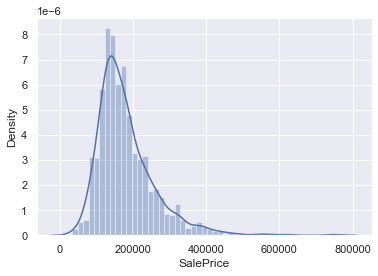

In [293]:
sns.distplot(train['SalePrice']);

In [294]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


平均値mean 標準偏差std 四分位数25%,75%

### 【問題4】欠損値への対応
欠損値に関して以下のことを行い、レポートしてください。

各特徴量の欠損値の有無を確認する。

欠損値の確認にはmissingnoというライブラリを活用しましょう。このライブラリにより欠損値の有無が可視化できます。インストールや使い方に関しては以下のページをご覧ください。

ResidentMario/missingno: Missing data visualization module for Python.

欠損値が何パーセント含まれるかを確認する。

In [295]:
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

<AxesSubplot:>

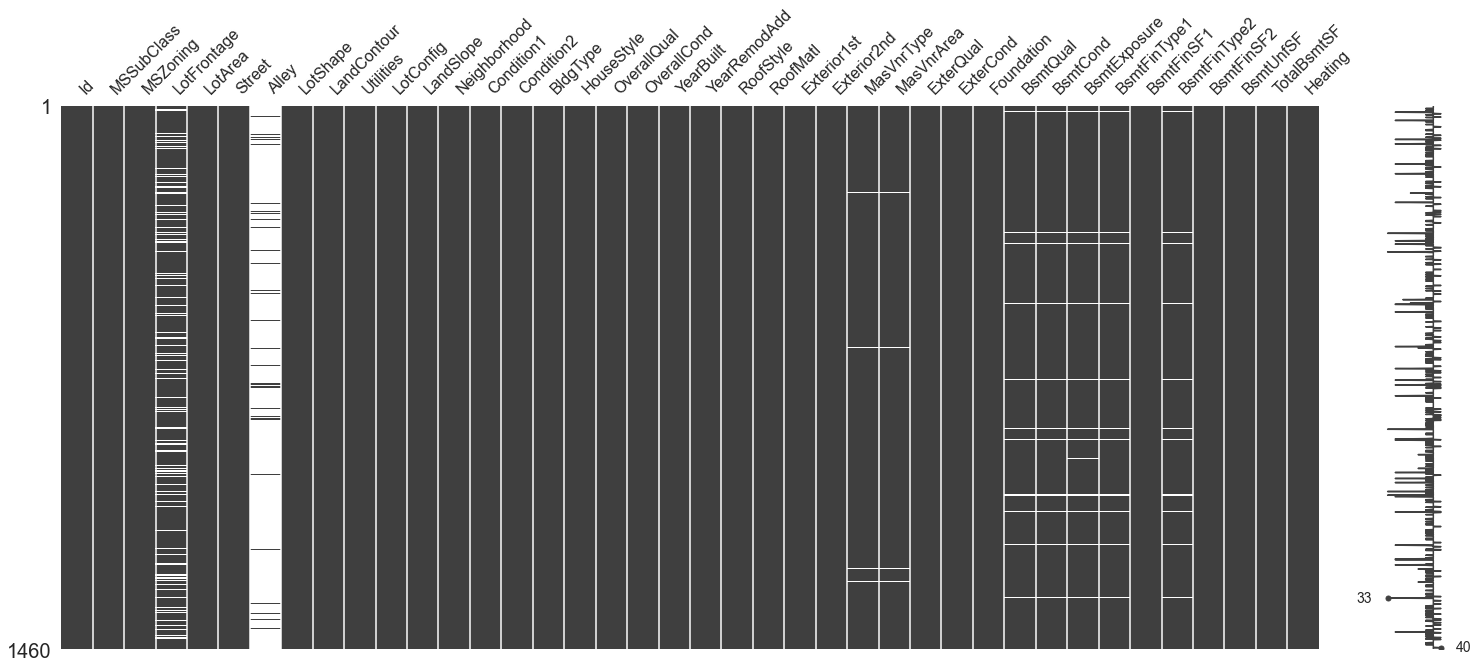

In [296]:
msno.matrix(train.iloc[:,:40])

<AxesSubplot:>

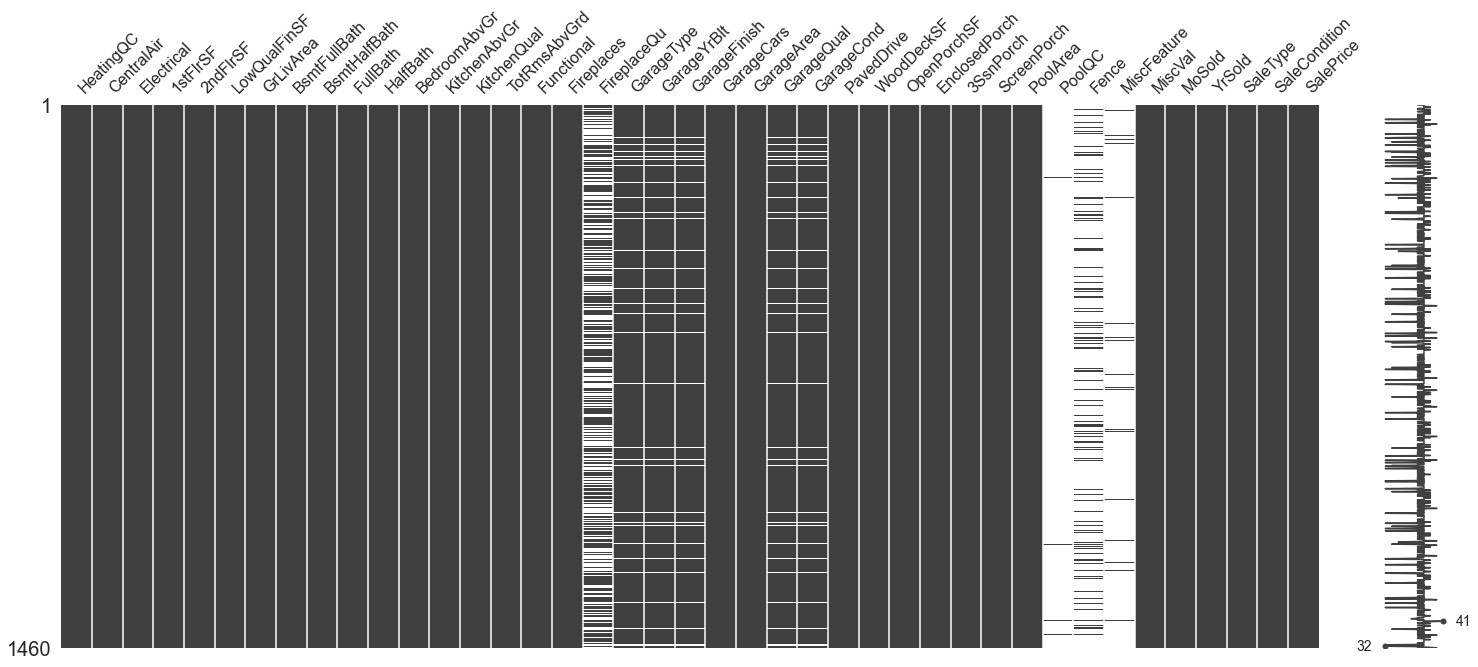

In [297]:
msno.matrix(train.iloc[:,40:])

<AxesSubplot:>

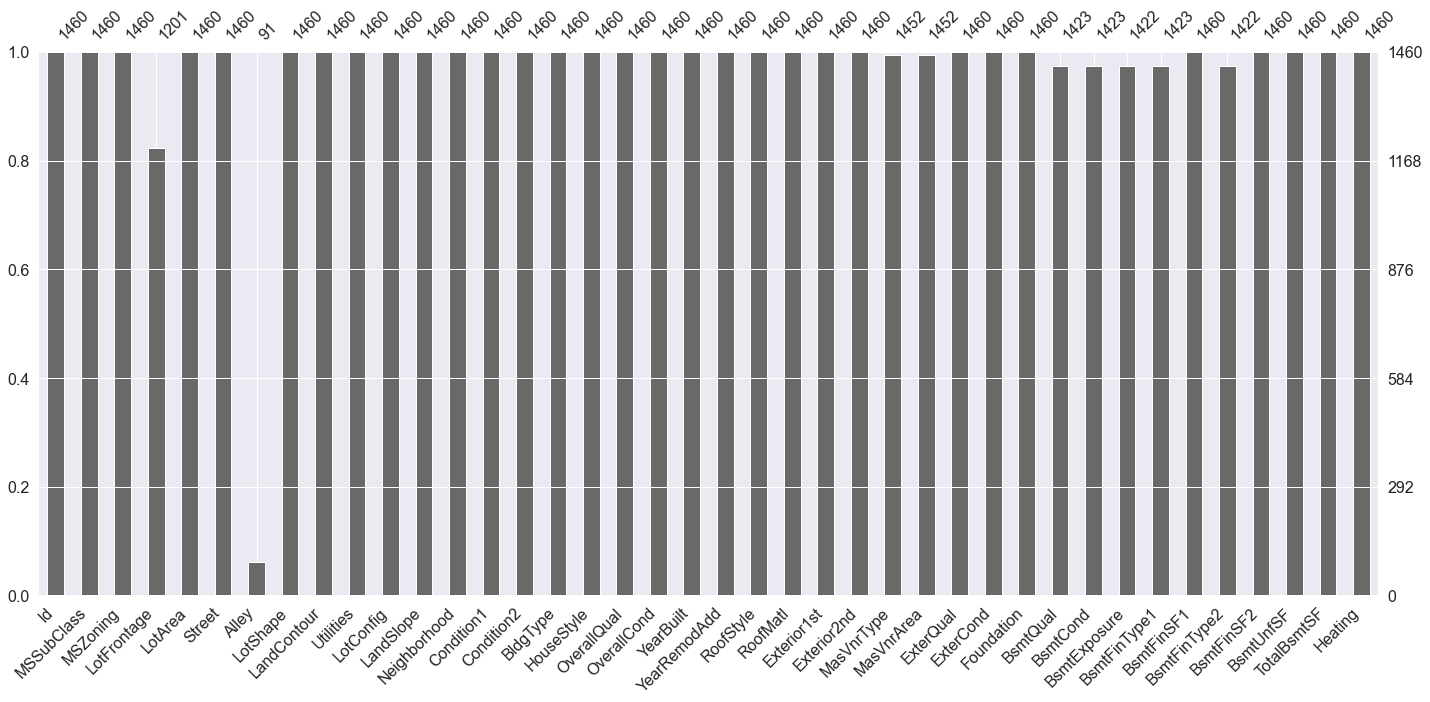

In [298]:
msno.bar(train.iloc[:,:40])

<AxesSubplot:>

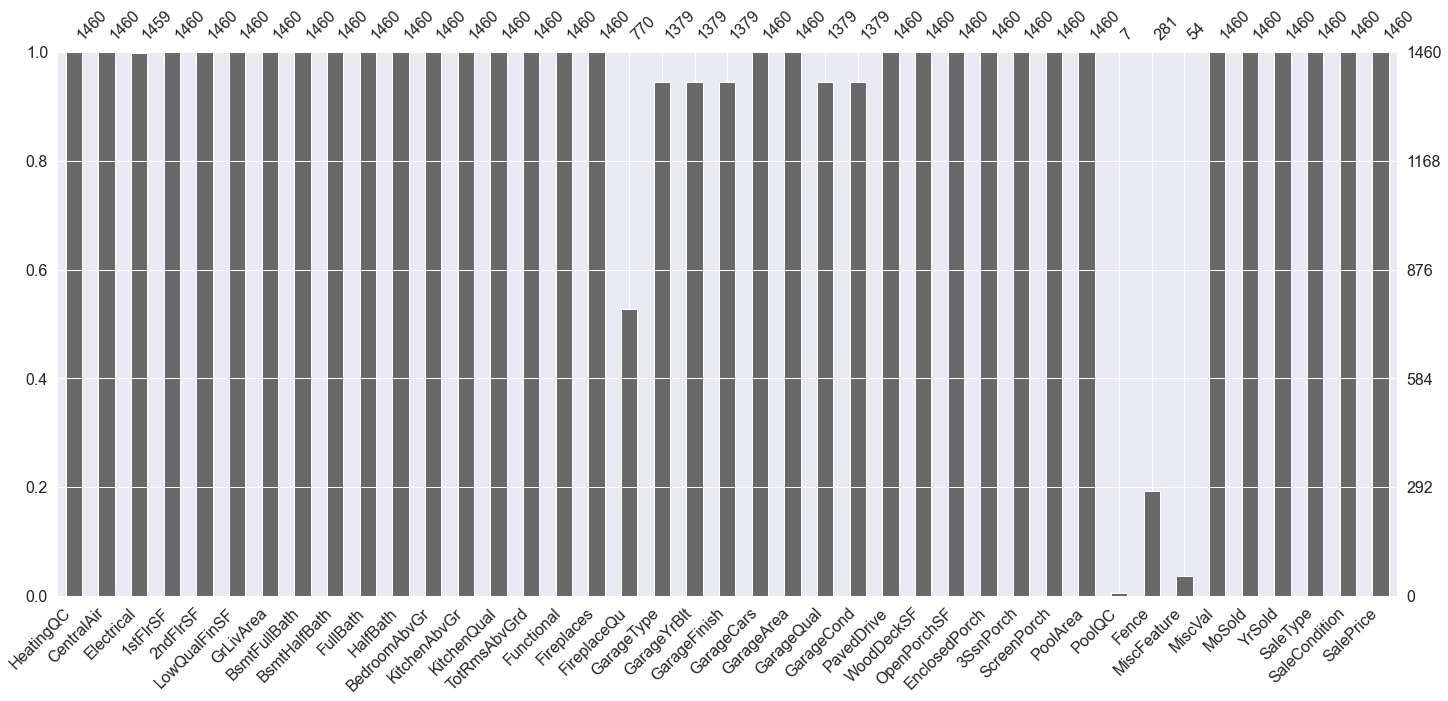

In [299]:
msno.bar(train.iloc[:,40:])

 欠損率の表示

In [2]:
df_null = df.isnull().sum()
df_null[df_null>0]

NameError: name 'df' is not defined

In [301]:
Total = train.isnull().sum().sort_values(ascending=False)
missing_ratio = Total / len(train) *100
null_train = pd.concat([Total,missing_ratio],1, keys=("Total","missing_raito"))
print(Total[Total>0])
null_train.head()

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


,Total,missing_raito
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274


In [302]:
# pd.options.display.float_format = '{: <10.2%}'.format

# missing_ratio = Total / len(train)
# null_train = pd.concat([Total,missing_ratio],1, keys=("Total","missing_raito"))
# null_train.head()

In [303]:
print(len(Total[Total>0]))

19


欠損がある列は19列、欠損数が5以上ある列は18列

<AxesSubplot:>

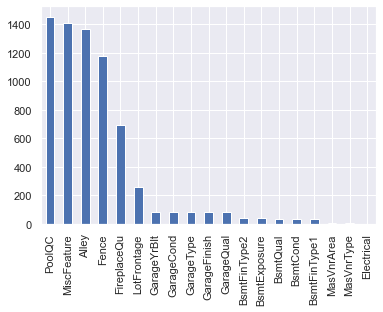

In [304]:
Total[Total>0].plot.bar()

プールがない、フェンスがない、ガレージがない、地下室がないなどにより欠損が発生している

全列81から18を引くと、63列となる

5つ以上欠損値がある特徴量（列）は削除する。
欠損値があるサンプル（行）は削除する。

In [305]:
train2 = train.dropna(thresh=len(train)-5,axis=1)
train2

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


63列となった

In [306]:
train2 = train2.dropna(how='any')
train2

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


1459行となった

### 【問題5】用語の調査
以下の２つの単語を知る必要があります。これらを調査してまとめてください。

尖度
歪度


歪度とは正規分布に比べて、左右に偏っているかを示す値。
負の歪度
データは図の右側に集中しています。そのため、左側に長い尾があります。左スキューまたは左テールとも呼ばれます。
正の歪度
データは図の左側にさらに集中しています。そのため、右側に長い尾があります。右スキューまたは右テールとも呼ばれます。

多くの統計的検定と機械学習モデルは、正規性の仮定に依存しています。したがって、歪度が大きいということは、データが正規分布ではなく、統計的検定や機械学習の予測力に影響を与える可能性があることを意味します。このような場合、データを正常に変換する必要があります。



尖度は正規分布に比べて、山の頂点が潰れているか尖っているかを示す値。

高い尖度
正規分布よりも尖度が大きいことを示しています。ピークはMesokurticよりも高く鋭いです。両側に重い裾があり、大きな外れ値を示しています。投資の世界では、高い尖度はリスクの高い投資であることを意味します。

低い尖度
ピークは正規分布よりも低く、幅が広い。両側に平らな尾があり、小さな外れ値を示しています。投資の世界では、板状の分布はそれが低リスクの投資であることを意味します。

### 【問題6】分布の確認
seabornのsns.distplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。
目的変数に対して対数変換を行う。
対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。

対数変換の前後での変化を「正規分布」という言葉を含めて説明してください。このように加工することで予測時の精度を上げることができます。

seaborn.distplot — seaborn 0.9.0 documentation


Skewness: 1.8819429948035529
Kurtosis: 6.529263049673958


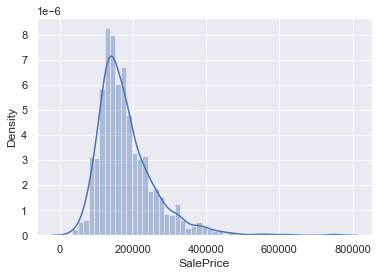

In [307]:
sns.distplot(train2['SalePrice'])
print("Skewness: {}" .format(train2['SalePrice'].skew()))
print("Kurtosis: {}" .format(train2['SalePrice'].kurt()))

対数変換後

Skewness: 0.12131775882415026
Kurtosis: 0.806927847502148


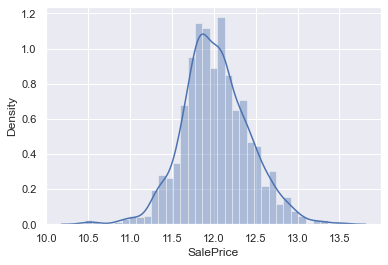

In [308]:
log_train = np.log(train2['SalePrice'])
sns.distplot(log_train)
print("Skewness: {}" .format(log_train.skew()))
print("Kurtosis: {}" .format(log_train.kurt()))

多くの統計的検定と機械学習モデルは、正規性の仮定に依存しています。
したがって、歪度や尖度が大きいということは、データが正規分布ではなく、統計的検定や機械学習の予測力に影響を与える可能性があることを意味します。

そのため対数変換を行うとより高い精度の予測が得られる。

# 7.特徴量


### 【問題7】相関係数の確認
特徴量の確認をしていきます。それぞれに対してマークダウンで説明や考察を書いてください。

相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。
目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。
選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。
選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。

《補足》

重回帰分析などで予測する場合、相関が高すぎる特徴量の組み合わせがあると予測に悪影響が出ることがあります。このような場合の簡単な対処方法として、そういった特徴量の組みを探し出して、１つに絞るということがあります。

In [309]:
train2.head()


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


<AxesSubplot:>

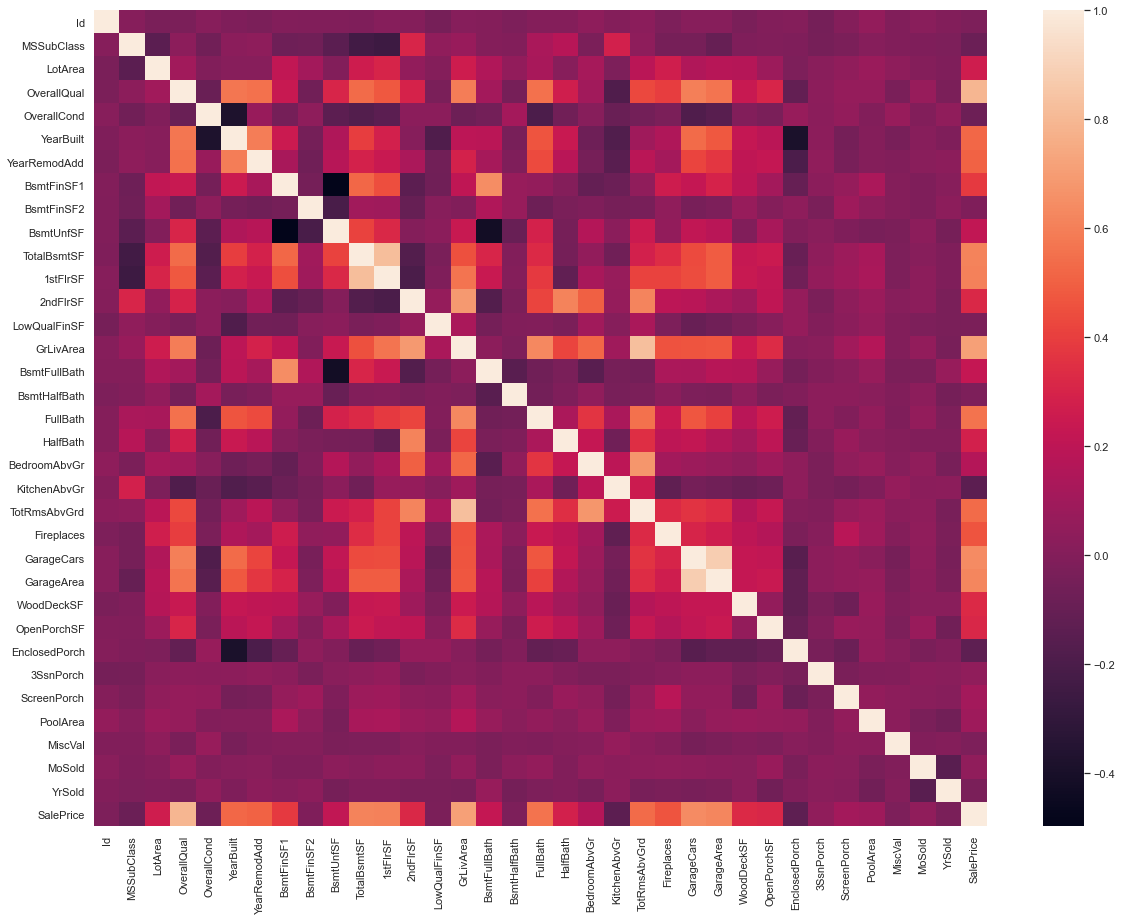

In [310]:
plt.figure(figsize=(20,15)) 
corr_train = train2.corr()
sns.heatmap(corr_train)

In [311]:
sale_ten = corr_train['SalePrice'].sort_values(ascending=False)[:11]
ten = sale_ten.index.values

<AxesSubplot:>

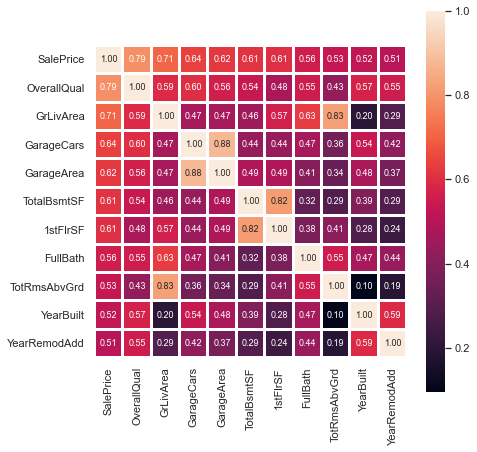

In [312]:
plt.figure(figsize=(7, 7))
corr_train2 = train2[ten].corr()
sns.heatmap(corr_train2, linewidths=2, annot=True, square=True, fmt='.2f', annot_kws={'size': 9},)

SalePrice        売値
OverallQual　 　　全体的な質　素材と仕上げ
GrLivArea　　　　 居住エリアの面積
GarageCars　　　　車庫車　収容数
GarageArea　　　　ガレージ面積 
TotalBsmtSF　　　 地下室の合計面積
1stFlrSF　　　　　 1階の面積
FullBath　　　　  バスルーム◆浴槽・シャワー・洗面台・便器の4点
TotRmsAbvGrd　　　総部屋数　一定品質以上のもの
YearBuilt　　　　　建造年
YearRemodAdd　　　改装年 

売値に深く関わっている10種の特徴量である。

下記に相関が高いものを記す
GarageCarsとGarageArea。
1stFlrSFとTotalBsmtSF
GrLivAreaとTotRmsAbvGrd
ガレージの面積と車の収容数は同じ意味にも取れるので相関が高い
一階の面積と地下室全体の面積も相関が高く1階が広いと地下室も広いと考えられる。居住エリアの面積と総部屋数も高い相関があることがわかる。


<AxesSubplot:>

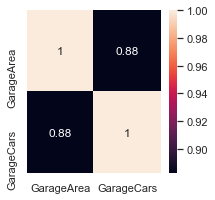

In [363]:
plt.figure(figsize=(3,3))
col1 = ['GarageArea', 'GarageCars']
col2 = ['1stFlrSF', 'TotalBsmtSF']
col3 = ['GrLivArea', 'TotRmsAbvGrd']
sns.heatmap(train[col1].corr(), annot=True)



<AxesSubplot:>

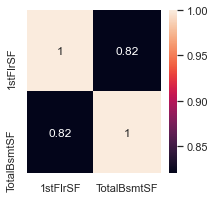

In [364]:
plt.figure(figsize=(3,3))
sns.heatmap(train[col2].corr(), annot=True)


<AxesSubplot:>

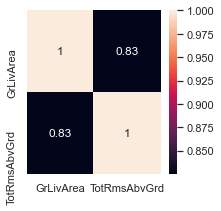

In [365]:
plt.figure(figsize=(3,3))

sns.heatmap(train[col3].corr(), annot=True)